In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

# Agglomerative (Bottom-Up) Hierarchical Clustering

Hierarchical Clustering is an alternative clustering algorithm to k-means. 
This algorithm can capture complex cluster structures. 
But it can only be used for relatively small datasets.

**Contents**

- [Hierarchical clustering step-by-step example](#1.-Hierarchical-clustering-steps-by-step-example)
- [Hierarchical clustering implementation](#2.-Hierarchical-clustering-implementation)
- [Testing hierarchical clustering](#3.-Testing-hierarchical-clustering)

## 1. Hierarchical clustering step-by-step example

Let us consider the following (small) toy dataset (with two clusters)

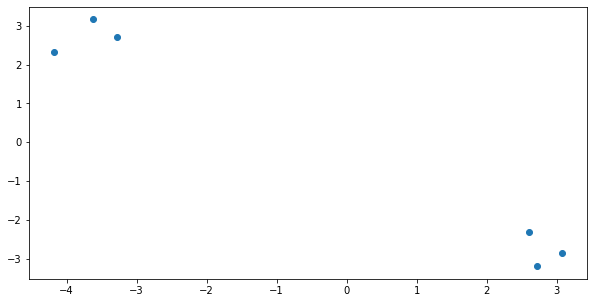

In [2]:
# generate the dataset
X = np.zeros((6,2)) #2 features; 6 data points
X[0:3] = .5*np.random.randn(3,2) + [-3,3] # blob 1; 3 points
X[3:6] = .5*np.random.randn(3,2) + [3,-3] # blob 2; 3 points

# plot the dataset
plt.figure(figsize=(10,5))
plt.scatter(X[:,0],X[:,1])

**Hierarchical Clustering** works as follows:

**Step 1**: Make each point its own cluster of one.

In [3]:
'Make each point its own cluster of one'
k = X.shape[0] # number of clusters = number of data points
clusters = np.arange(k) #np.array([0,1,...,k-1])

In [4]:
clusters

array([0, 1, 2, 3, 4, 5])

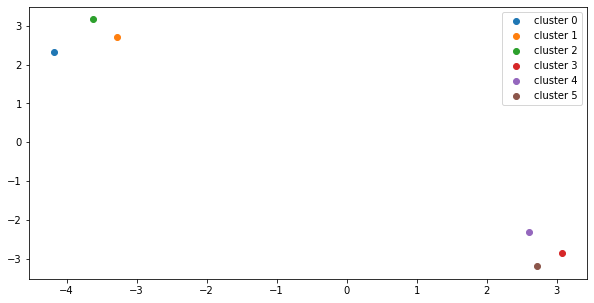

In [5]:
'plot the clusters'
plt.figure(figsize=(10,5))
for i in range(k):
    plt.scatter(X[clusters==i,0],X[clusters==i,1],label = 'cluster '+str(i))
plt.legend()

**Step 2**: Merge the two closest clusters

We need to define **intercluster distance** (the linkage function).
We have several options:

- **Centroid linkage:** The distance between two clusters is defined as the distance between their centers (means).
- **Single linkage:** The distance between two clusters is defined as the **smallest** distance between two points in each cluster.
-  **Complete linkage:** The distance between two clusters is defined as the **largest** distance between two points in each cluster.
- **Average linkage:** The distance between two clusters is defined as the **average** distance between two points in each cluster.

We'll implement the second (single linkage).

To decide which two clusters to merge, we need to compute all pairwise distances between any two clusters

In [6]:
dist = pairwise_distances(X)
np.fill_diagonal(dist, np.inf) # set the distance from a cluster to itself to infinity
np.round(dist,2)

array([[ inf, 0.98, 1.  , 8.92, 8.22, 8.84],
       [0.98,  inf, 0.57, 8.45, 7.74, 8.42],
       [1.  , 0.57,  inf, 9.01, 8.3 , 8.99],
       [8.92, 8.45, 9.01,  inf, 0.72, 0.49],
       [8.22, 7.74, 8.3 , 0.72,  inf, 0.89],
       [8.84, 8.42, 8.99, 0.49, 0.89,  inf]])

Second, we need to find the closest clusters

In [7]:
np.argmin(dist)

23

In [8]:
np.unravel_index(np.argmin(dist),(k,k))

(3, 5)

In [9]:
i, j = np.unravel_index(np.argmin(dist),(k,k))
i,j = np.sort([i,j]) # reorder the pair (i,j) so that  j>i
print('the closest clusters are cluster '+str(i)+' and cluster '+str(j))

the closest clusters are cluster 3 and cluster 5


Finally, we need to merge clusters i and j

In [10]:
clusters[clusters==j]=i
clusters

array([0, 1, 2, 3, 4, 3])

rename the clusters

In [11]:
clusters[clusters>j] -= 1
clusters

array([0, 1, 2, 3, 4, 3])

and reduce number of clusters k by 1

In [12]:
k = k-1
k

5

Let us plot the clusters. 
Notice that there is a cluster with two points.

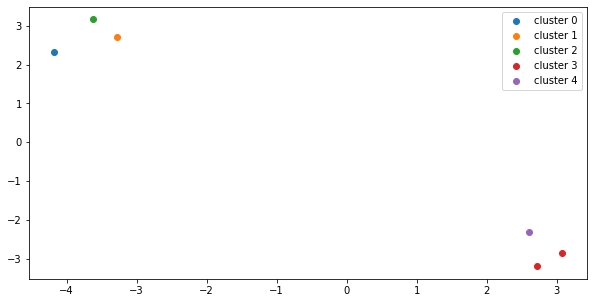

In [13]:
'plot the clusters'
plt.figure(figsize=(10,5))
for i in range(k):
    'plot ith cluster'
    plt.scatter(X[clusters==i,0],X[clusters==i,1],label = 'cluster '+str(i))
plt.legend()

We need to recompute the distances from the new cluster i to the remaining clusters.

In [14]:
# distance from cluster i to the other clusters
dist[i] = np.minimum(dist[i],dist[j]) 
# dist matrix is symmetric
dist[:,i] = dist[i] 
# set the distance from cluster i to itself to infinity
dist[i,i]= np.inf
# remove row j; 
dist = np.delete(dist,j,0) 
# remove column j
dist = np.delete(dist,j,1) 

dist

array([[       inf, 0.97739625, 1.00140933, 8.91546206, 8.21900312],
       [0.97739625,        inf, 0.56672197, 8.45200131, 7.74055893],
       [1.00140933, 0.56672197,        inf, 9.00873643, 8.29592755],
       [8.91546206, 8.45200131, 9.00873643,        inf, 0.4850285 ],
       [8.21900312, 7.74055893, 8.29592755, 0.4850285 ,        inf]])

We repeat this process until we have only one cluster

the closest clusters are cluster 0 and cluster 1


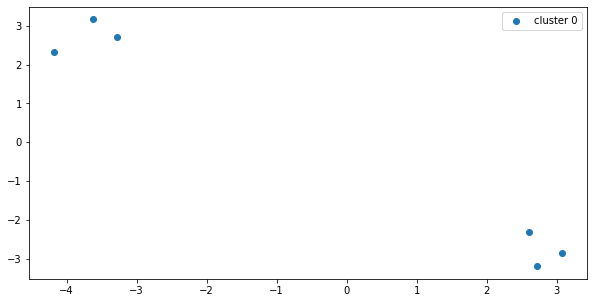

In [18]:
# find closest clusters
i, j = np.unravel_index(np.argmin(dist),(k,k))
i,j = np.sort([i,j]) # reorder the pair (i,j) so that  j>i
print('the closest clusters are cluster '+str(i)+' and cluster '+str(j))

# merge clusters
clusters[clusters==j]=i

# rename clusters
clusters[clusters>j] -= 1

# reduce number of clusters by one
k = k-1

# recompute distances:

# distance from cluster i to the other clusters
dist[i] = np.minimum(dist[i],dist[j]) 
# dist matrix is symmetric
dist[:,i] = dist[i] 
# set the distance from cluster i to itself to infinity
dist[i,i]= np.inf
# remove row j; 
dist = np.delete(dist,j,0) 
# remove column j
dist = np.delete(dist,j,1) 

# plot clusters
plt.figure(figsize=(10,5))
for i in range(k):
    plt.scatter(X[clusters==i,0],X[clusters==i,1],label = 'cluster '+str(i))
plt.legend()

## 2. Hierarchical clustering implementation

In [19]:
def hierarchical_clustering(X,n_clusters=1):   
    from sklearn.metrics import pairwise_distances
    
     #dataset size, number of features
    m,n = X.shape
    
    # cluster distance matrix
    dist = pairwise_distances(X)
    np.fill_diagonal(dist, np.inf)
    
    # Make each point its own cluster of one
    k = m 
    clusters = np.arange(k)

    # hierarchical clustering iteration'
    while k>n_clusters:  
        
        # find closest clusters
        i, j = np.unravel_index(np.argmin(dist),(k,k))
        i,j = np.sort([i,j]) # reorder the pair (i,j) so that  j>i
        
        # merge clusters
        clusters[clusters==j]=i

        # rename clusters
        clusters[clusters>j] -= 1
        
        # recompute distance from the new cluster i to the remaining clusters'
        dist[i] = np.minimum(dist[i],dist[j]) # 
        dist[:,i] = dist[i] # distance_clusters matrix is symmetric
        dist[i,i]= np.inf # set the distance from cluster i to itself to infinity
            
        # remove row j and column j from distance_clusters matrix
        dist = np.delete(dist,j,0) # remove row j
        dist = np.delete(dist,j,1) # remove column j
        
    
        # reduce number of clusters
        k = k-1

    return clusters

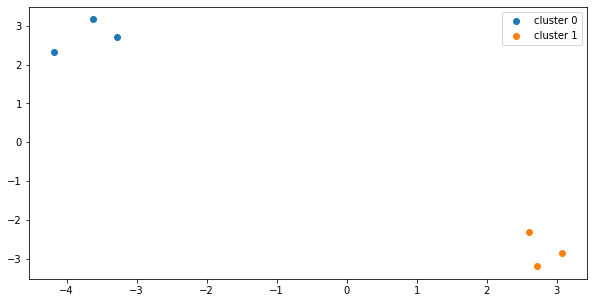

In [20]:
# check that it works
n_clusters=2
clusters = hierarchical_clustering(X,n_clusters)

# plot  clusters
plt.figure(figsize=(10,5))
for i in range(n_clusters):
    plt.scatter(X[clusters==i,0],X[clusters==i,1],label = 'cluster '+str(i))
plt.legend()

## 3. Testing hierarchical clustering

**Test 1:** The four-blobs dataset

Text(0.5, 1.0, 'Four-blobs Dataset')

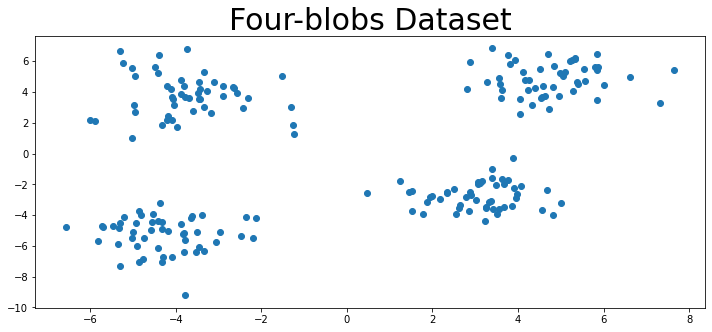

In [21]:
X = np.zeros((200,2)) #2 features; 200 data points
X[0:50] = np.random.randn(50,2) + [-4,4] # blob 1
X[50:100] = np.random.randn(50,2) + [3,-3] # blob 2
X[100:150] = np.random.randn(50,2) + [5,5] # blob 3
X[150:200] = np.random.randn(50,2) + [-4,-5] # blob 4

'plot dataset'
plt.figure(figsize=(12,5))
plt.scatter(X[:,0],X[:,1])
plt.title('Four-blobs Dataset',fontsize=30)

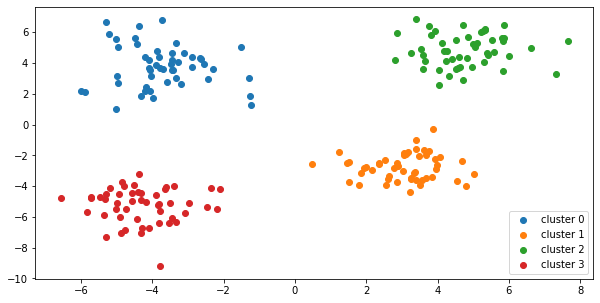

In [22]:
n_clusters=4
clusters = hierarchical_clustering(X,n_clusters)

# plot  clusters
plt.figure(figsize=(10,5))
for i in range(n_clusters):
    plt.scatter(X[clusters==i,0],X[clusters==i,1],label = 'cluster '+str(i))
plt.legend()

**Test 2:** Unevenly sized clusters

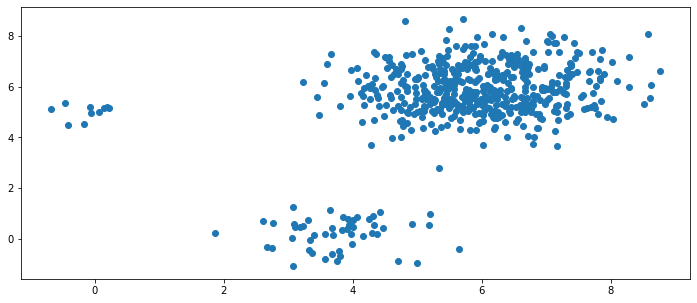

In [23]:
X = np.zeros((560,2)) 
X[0:500] = np.random.randn(500,2) + [6,6] # blob 1 (big)
X[500:550] = 0.7*np.random.randn(50,2) + [4,0] # blob 2 (medium)
X[550:560] = 0.5*np.random.randn(10,2) + [0,5] # blob 3 (small)

plt.figure(figsize=(12,5))
plt.scatter(X[:,0],X[:,1])

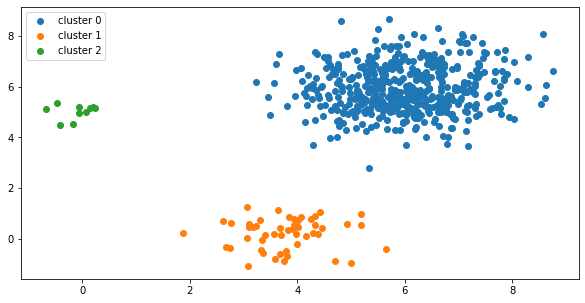

In [24]:
n_clusters=3
clusters = hierarchical_clustering(X,n_clusters)

# plot  clusters
plt.figure(figsize=(10,5))
for i in range(n_clusters):
    plt.scatter(X[clusters==i,0],X[clusters==i,1],label = 'cluster '+str(i))
plt.legend()

**Test 3:** Two moons dataset

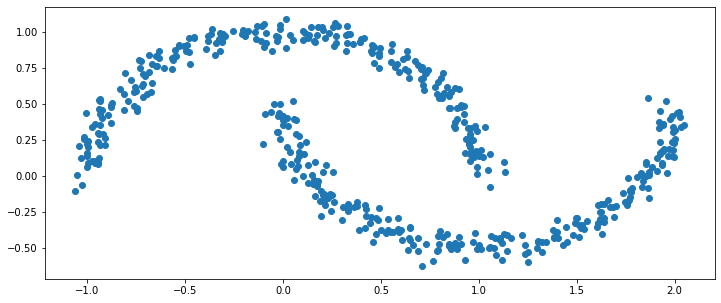

In [25]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=500,noise=0.05)

plt.figure(figsize=(12,5))
plt.scatter(X[:,0],X[:,1])

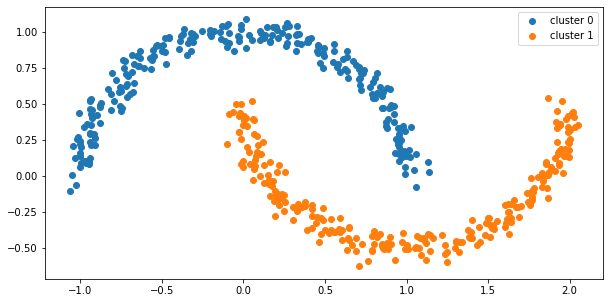

In [26]:
n_clusters=2
clusters = hierarchical_clustering(X,n_clusters)

# plot  clusters
plt.figure(figsize=(10,5))
for i in range(n_clusters):
    plt.scatter(X[clusters==i,0],X[clusters==i,1],label = 'cluster '+str(i))
plt.legend()

**Test 4:** Two circles dataset

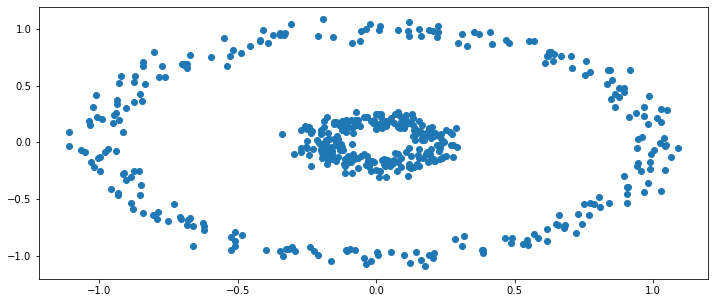

In [27]:
from sklearn.datasets import make_circles
X,y = make_circles(n_samples=500,noise=0.05, factor=0.2)


plt.figure(figsize=(12,5))
plt.scatter(X[:,0],X[:,1])

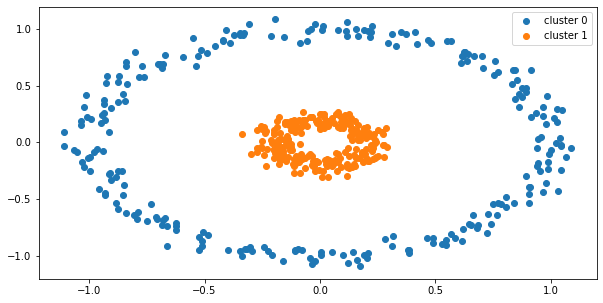

In [28]:
n_clusters=2
clusters = hierarchical_clustering(X,n_clusters)

# plot  clusters
plt.figure(figsize=(10,5))
for i in range(n_clusters):
    plt.scatter(X[clusters==i,0],X[clusters==i,1],label = 'cluster '+str(i))
plt.legend()